* Step1: 产生规则的模拟数据
* Step2: 产生没有规则的数据
* Step3: 对模型进行训练
* Step4: 对各个点进行评分
* Step5：对异常点进行标识

`我的想法：利用该方式是否可以迁移到outlier可视化方面`

在图神经网络中，利用一个很小的数据集，例如空手道数据集注入outlier，然后用不同颜色分别可视化出对数据的预测情况：正常<->正常，正常<->异常，异常<->异常，异常<->正常

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [4]:
rng = np.random.RandomState(42)
n_sample = 256 * 10
# 模拟数据的生成
X = 0.3 * rng.randn(n_sample, 2)
print(X)
print(X.shape)
X_train = np.r_[X + 2, X - 2]
print(X_train)
print(X_train.shape)

[[ 0.14901425 -0.04147929]
 [ 0.19430656  0.45690896]
 [-0.07024601 -0.07024109]
 ...
 [-0.04025406  0.15580762]
 [ 0.50200918 -0.17683572]
 [-0.47472839  0.2450511 ]]
(2560, 2)
[[ 2.14901425  1.95852071]
 [ 2.19430656  2.45690896]
 [ 1.92975399  1.92975891]
 ...
 [-2.04025406 -1.84419238]
 [-1.49799082 -2.17683572]
 [-2.47472839 -1.7549489 ]]
(5120, 2)


In [5]:
# 产生具有规律的样本
X = 0.3 * rng.randn(1000, 2)
X_test = np.r_[X + 2, X - 2]
print(X_test)
print(X_test.shape)

[[ 1.58582039  1.86915337]
 [ 1.92271385  1.97910996]
 [ 2.20674934  1.79490972]
 ...
 [-1.68162312 -2.13001687]
 [-1.47404156 -2.10954578]
 [-2.2521479  -1.79382846]]
(2000, 2)


In [6]:
# 产生没有规律的观察样本
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
print(X_outliers)
print(X_outliers.shape)

[[-2.83771192 -1.46966121]
 [ 3.80856469 -1.9453474 ]
 [-0.35098233 -3.75983819]
 [-0.82217976  0.57056012]
 [ 3.6249969   0.13388836]
 [ 2.55285861  0.37702114]
 [-3.67371989 -1.4799338 ]
 [ 0.60439606  3.60475173]
 [ 2.87304288 -2.17315509]
 [-2.23912136 -2.39061626]
 [ 3.37999117  2.82132922]
 [ 2.19906746 -0.85811909]
 [ 0.03504563 -0.28534604]
 [-1.97281514  0.04022437]
 [-3.75602762 -2.94551701]
 [ 3.09271677  2.01343814]
 [-0.61705273  0.1372029 ]
 [-1.04000891  1.92623894]
 [ 2.27349743  2.10628152]
 [ 1.7808938  -2.36396529]]
(20, 2)


In [7]:
X_test_all = np.concatenate((X_test, X_outliers), axis=0)
print(X_test_all)
print(X_test_all.shape)

[[ 1.58582039  1.86915337]
 [ 1.92271385  1.97910996]
 [ 2.20674934  1.79490972]
 ...
 [-1.04000891  1.92623894]
 [ 2.27349743  2.10628152]
 [ 1.7808938  -2.36396529]]
(2020, 2)


In [8]:
# 训练模型
clf = IsolationForest(max_samples=n_sample, random_state=rng)
clf.fit(X_train)
# 返回正常或异常的标志，1是正常，-1是异常
y_pred_train = clf.predict(X_train)
print(y_pred_train)
y_pred_test = clf.predict(X_test)
print(y_pred_test)
y_pred_outliers = clf.predict(X_outliers)
print(y_pred_outliers)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]


In [9]:
test_shape = X_test_all.shape[0]
print(test_shape)

2020


In [10]:
batch = 256
all_pred = []
for i in range(int(test_shape / batch) + 1):
    start = i * batch
    end = min((i + 1) * batch, test_shape)
    test = X_test_all[start:end]
    print(test)
    # 预测
    pred = clf.predict(test)
    all_pred.extend(pred)

[[1.58582039 1.86915337]
 [1.92271385 1.97910996]
 [2.20674934 1.79490972]
 [1.91788122 1.99571889]
 [2.04487939 2.02934815]
 [2.13080173 2.25315185]
 [2.11779023 2.13607566]
 [1.52533305 2.01506831]
 [2.14385226 2.21868236]
 [1.79229477 1.80228822]
 [1.8277698  2.16092417]
 [2.31016432 1.87776197]
 [2.27238869 2.03704394]
 [1.96271427 1.93658473]
 [2.22398341 2.09767335]
 [2.68274763 1.74433261]
 [2.15543051 1.8412397 ]
 [1.7392139  1.99673986]
 [2.04120574 2.87545207]
 [1.94475626 1.66094638]
 [2.08190322 1.37760799]
 [1.97241297 2.00480758]
 [2.23838011 2.29208667]
 [1.84892911 1.9548158 ]
 [1.77016375 1.66158123]
 [2.09296843 1.61792434]
 [1.87561193 1.70144781]
 [2.16490496 2.54042903]
 [1.60952361 1.44409446]
 [1.96253393 2.00470934]
 [2.06559779 1.86610385]
 [1.93980821 2.11025312]
 [2.31212927 1.41348537]
 [1.88931817 2.06414264]
 [1.72460717 2.51935089]
 [1.80937704 1.98761219]
 [2.16680663 1.82261456]
 [1.44602809 1.87140364]
 [2.30883217 1.89893146]
 [1.74606971 2.27770166]


In [12]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
print(xx.shape)
print(yy.shape)

(50, 50)
(50, 50)


In [13]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # 正常分数，为正则为正常，为负可以认为是异常
print(Z)
print(Z.shape)

[-0.24592533 -0.24592533 -0.24592533 ... -0.28853027 -0.28853027
 -0.28853027]
(2500,)


In [14]:
Z = Z.reshape(xx.shape)

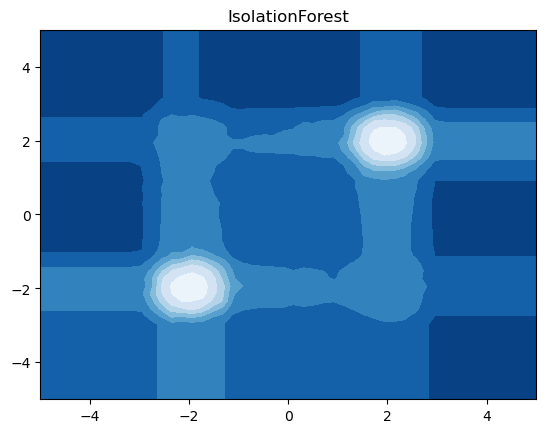

In [15]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

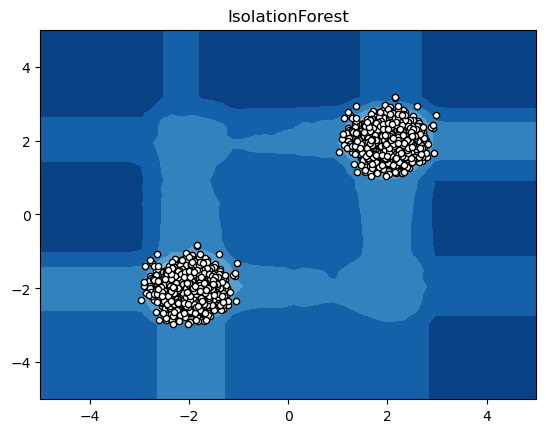

In [20]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')

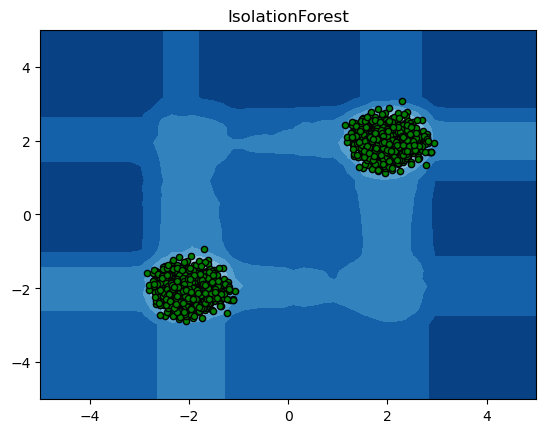

In [21]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
#                  s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')

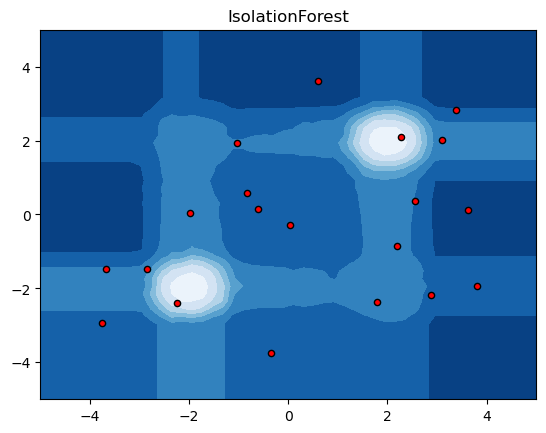

In [22]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
# b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
#                  s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')

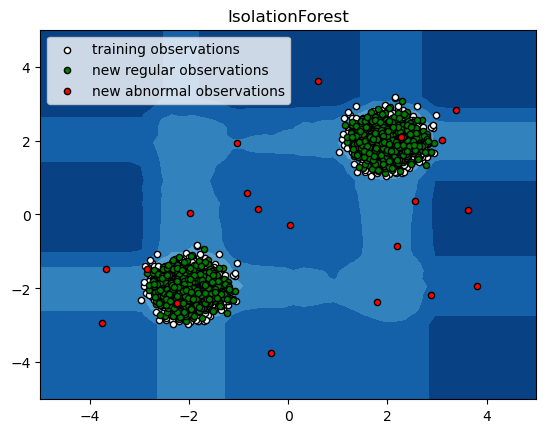

In [17]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))  
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")  
plt.show()

In [24]:
# test
x = np.linspace(-3, 3, 3)  # 生成连续数据
y = np.linspace(-3, 3, 3)  # 生成连续数据
X, Y = np.meshgrid(x, y)
print(x)
print(y)
print(X)
print(Y)

[-3.  0.  3.]
[-3.  0.  3.]
[[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]]
[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]
